In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] = "Times New Roman"

In [57]:
Iave = np.linspace(0.005, 7.5, 500) 

E0 = 4.0e+9 # particle energy in eV
alpha_c = 3.25e-4 # momentum compaction factor
omega_rf = 2*np.pi*508.887e+6 # rf frequency in rad/s 

Ncav = 22 # Number of cavities

Vc = 0.48e+6*Ncav # cavity voltage in Volt 
U0 = 1.87e+6 # Energy loss per turn in eV 

RoverQ = 14.8*Ncav # R/Q in Ohm
QL = 3.0e+4 # loaded Q
beta = 2.7 # coupling factor
Q0 = QL*(1+beta) # unloaded Q

Rsh = RoverQ*Q0 # shunt imp. in Ohm
phi_s = np.arccos(U0/(Vc))  # sync. phase in radian

psi = - np.arctan(Rsh*Iave*np.sin(phi_s)/(Vc*(1+beta))) #+ np.pi/2 # tuning angle

omega_res = omega_rf/(1 + Rsh*Iave*np.sin(phi_s)/(2*Q0*Vc) ) # resonant freq.
tau_f = 2*QL/omega_res # filling time
alpha_f = 1/tau_f 

h = 5120 # harmonic number
omega0 = omega_rf/h # rev. freq.
T0 = 2*np.pi/omega0 # rev. time

delta_f = omega_rf/(2*np.pi*2*QL)*np.tan(psi)


omega_s0 = np.sqrt(Vc*omega_rf*alpha_c*np.sin(phi_s)/(E0*T0)) # Synch. freq. for a single particle


K = alpha_c*Iave/(E0*T0)*(Rsh/2)/(1+beta) 
tilde_omega_s = abs(omega_s0**2 + K*omega_rf*np.sin(2*psi))**0.5 # Synch. freq. with beam loading

Vbr = Rsh*Iave/(1+beta)

Ilim = (1+beta)*Vc/(Rsh*np.cos(phi_s))


print("E0=%.3e eV" % (E0))
print("alpha_c=%.3e" % alpha_c )
print("frf=%.3e Hz" % (omega_rf/(2*np.pi)))
print("f0=%.3e Hz" % (omega0/(2*np.pi)))
print("fs0=%.3e Hz" % (omega_s0/(2*np.pi)))
print("h=%s" % h)
print("U0=%.3e eV" % (U0))
print("phi_s=%.3e" % phi_s)
print("Vc=%.3e V" % Vc)

print("Rsh=%.3e Ohm" % Rsh)
print("RoverQ=%.3e Ohm" % (Rsh/Q0))
print("Q0=%.3e" % Q0)
print("QL=%.3e" % QL)
print("beta=%.3e" % beta)
print("Ith=%.3e A" % Ilim)



roots = np.zeros((4, len(Iave)), dtype=complex)

norm=1e+3

for i in range(len(Iave)):


    coeff = [1, 2*alpha_f[i]/norm,
            ( (1+np.tan(psi[i])**2)*alpha_f[i]**2 + omega_s0**2)/norm**2,
             2*(alpha_f[i]*omega_s0**2)/norm**3,
             ( (1+np.tan(psi[i])**2) + Vbr[i]*np.tan(psi[i])/(Vc*np.sin(phi_s)) )*omega_s0**2*alpha_f[i]**2/norm**4]
    
    R = np.roots(coeff)
    
    roots[:,i] = sorted(R, key=lambda x: x.real)
    

    
#    roots[:,i] = R

    
    
   

E0=4.000e+09 eV
alpha_c=3.250e-04
frf=5.089e+08 Hz
f0=9.939e+04 Hz
fs0=2.607e+03 Hz
h=5120
U0=1.870e+06 eV
phi_s=1.393e+00
Vc=1.056e+07 V
Rsh=3.614e+07 Ohm
RoverQ=3.256e+02 Ohm
Q0=1.110e+05
QL=3.000e+04
beta=2.700e+00
Ith=6.105e+00 A


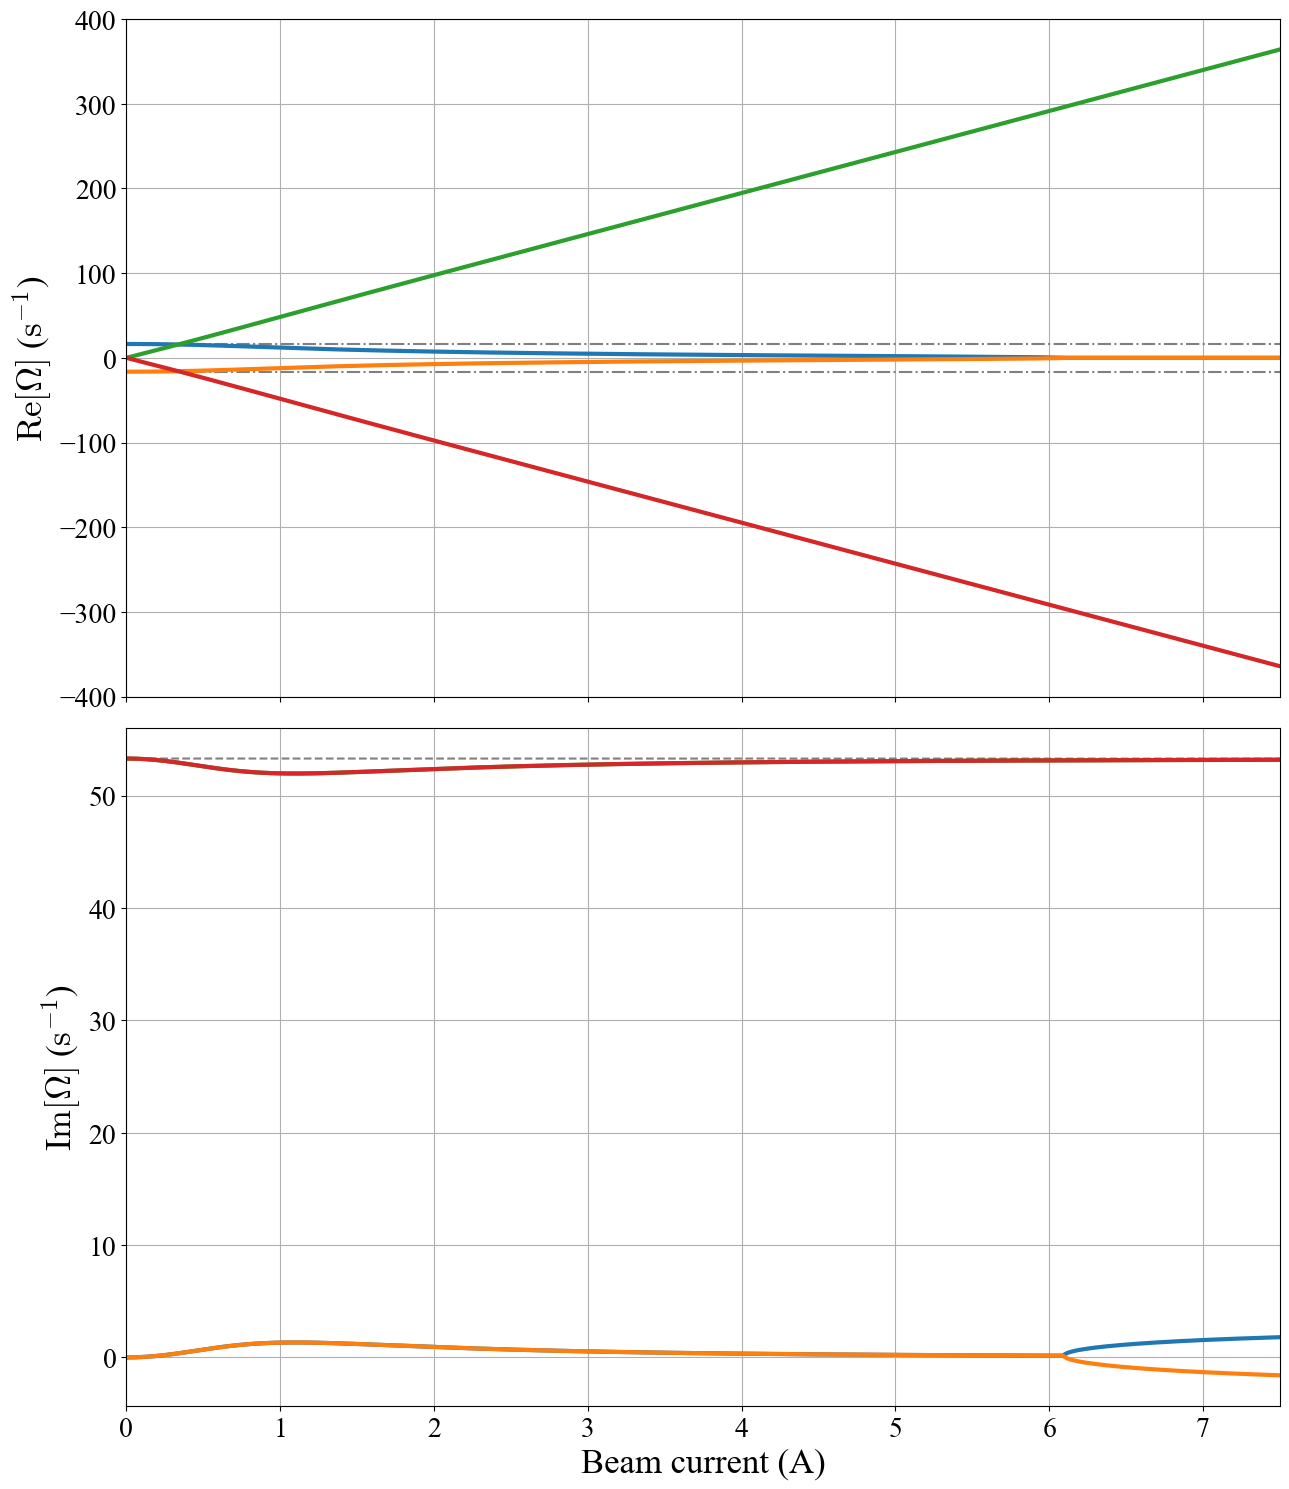

In [58]:
fig, ax = plt.subplots(2, figsize=(13,15), sharex=True)

ax[0].plot(Iave, 2*np.pi*delta_f*1e-3, ls='--', color='gray')
ax[0].plot(Iave, -2*np.pi*delta_f*1e-3, ls='--', color='gray')
ax[0].axhline(omega_s0*1e-3, ls='-.', color='gray')
ax[0].axhline(-omega_s0*1e-3, ls='-.', color='gray')
ax[1].plot(Iave, alpha_f*1e-3, ls='--', color='gray')

for i in [2,3,0,1]:
    ax[0].plot(Iave, roots[i].imag, lw=3)
    ax[1].plot(Iave, -roots[i].real, lw=3)

for i in range(2):
    ax[i].tick_params(labelsize=20)
    ax[i].grid()

ax[0].set_ylabel(r'$\mathrm{Re}[\Omega]$ ($\mathrm{s^{-1}}$)', fontsize=25)
ax[1].set_ylabel(r'$\mathrm{Im}[\Omega]$ ($\mathrm{s^{-1}}$)', fontsize=25)
ax[1].set_xlabel('Beam current (A)', fontsize=25)

ax[1].set_xlim((0., max(Iave)))

plt.tight_layout()
plt.show()

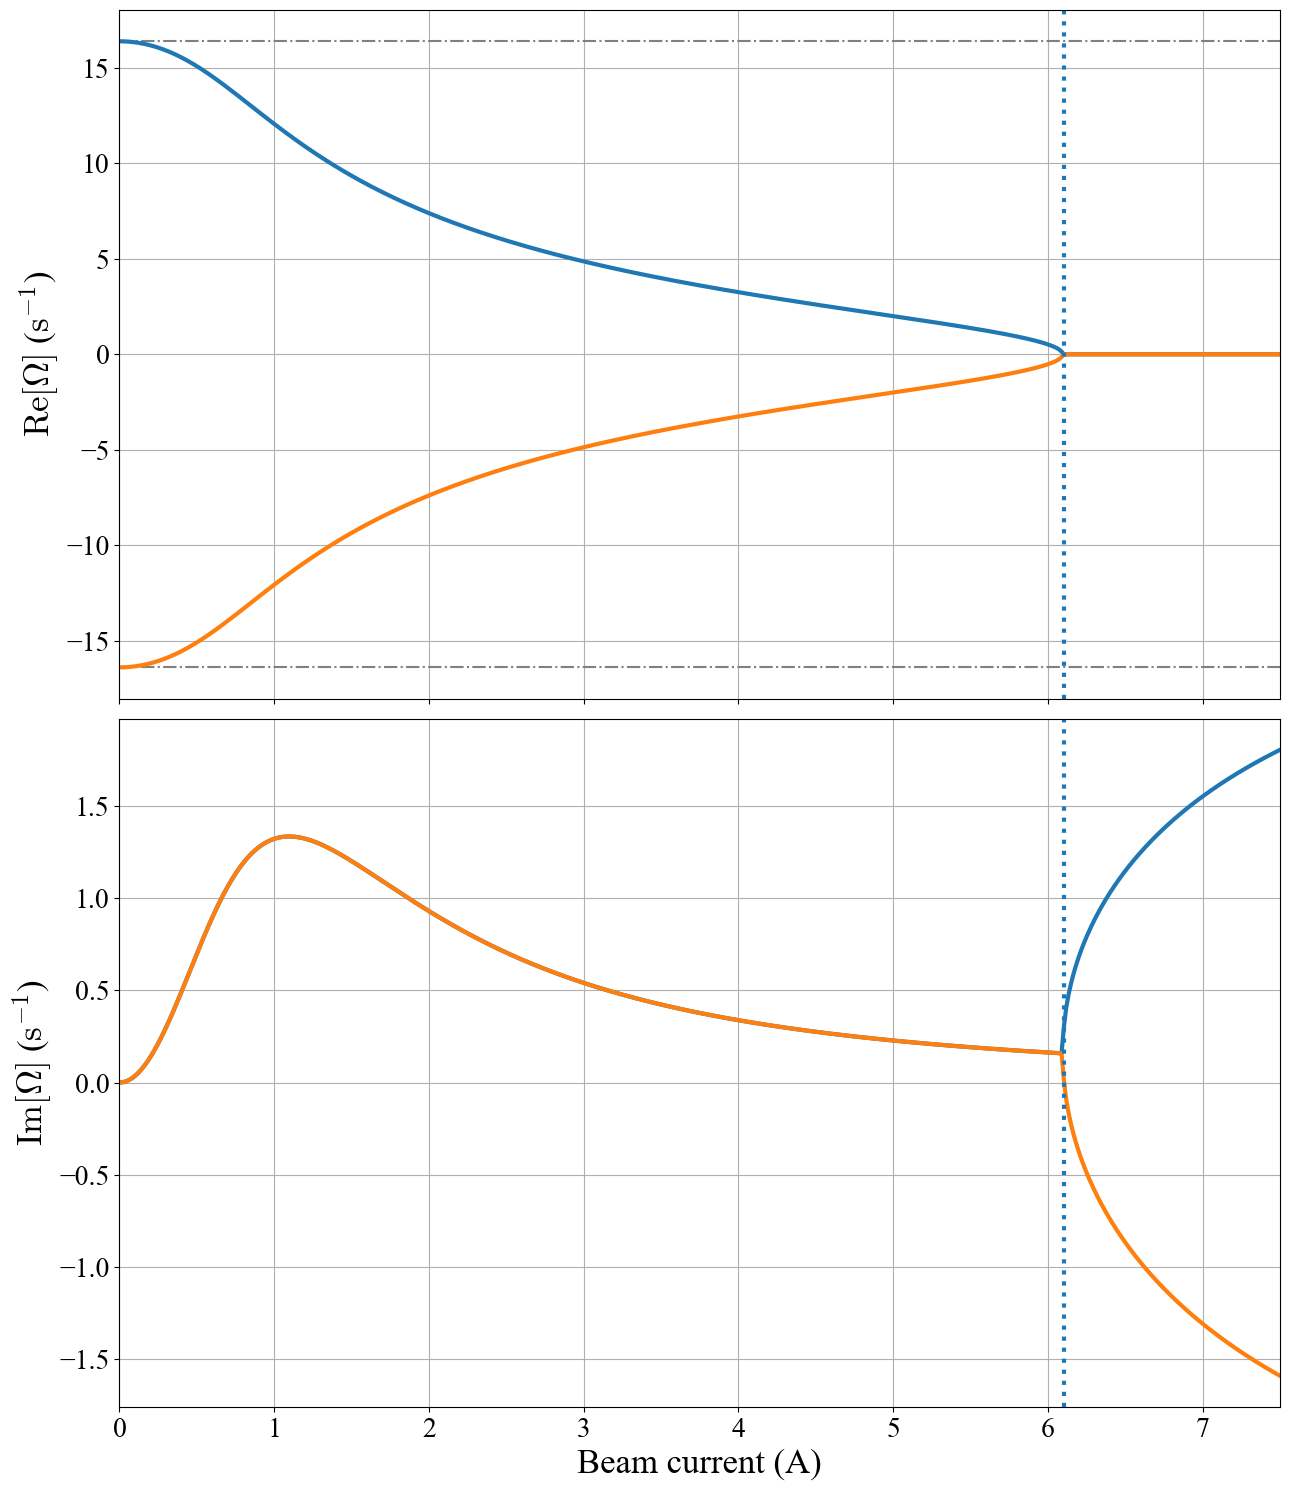

In [64]:
fig, ax = plt.subplots(2, figsize=(13,15), sharex=True)

#ax[0].plot(Iave, 2*np.pi*delta_f*1e-3, ls='--', color='gray')
#ax[0].plot(Iave, -2*np.pi*delta_f*1e-3, ls='--', color='gray')
ax[0].axhline(omega_s0*1e-3, ls='-.', color='gray')
ax[0].axhline(-omega_s0*1e-3, ls='-.', color='gray')
#ax[1].plot(Iave, alpha_f*1e-3, ls='--', color='gray')

for i in [2,3]:
    ax[0].plot(Iave, roots[i].imag, lw=3)
    ax[1].plot(Iave, -roots[i].real, lw=3)

for i in range(2):
    ax[i].tick_params(labelsize=20)
    ax[i].grid()
    ax[i].axvline(Ilim, ls=':', lw=3.0)

ax[0].set_ylabel(r'$\mathrm{Re}[\Omega]$ ($\mathrm{s^{-1}}$)', fontsize=25)
ax[1].set_ylabel(r'$\mathrm{Im}[\Omega]$ ($\mathrm{s^{-1}}$)', fontsize=25)
ax[1].set_xlabel('Beam current (A)', fontsize=25)

ax[1].set_xlim((0., max(Iave)))



plt.tight_layout()
plt.show()

In [49]:
Iave = np.linspace(0.005, 2.5, 500) 

E0 = 4.0e+9 # particle energy in eV
alpha_c = 3.25e-4 # momentum compaction factor
omega_rf = 2*np.pi*508.887e+6 # rf frequency in rad/s 

Ncav = 22 # Number of cavities

Vc = 0.24e+6*Ncav # cavity voltage in Volt 
U0 = 1.87e+6 # Energy loss per turn in eV 

RoverQ = 14.8*Ncav # R/Q in Ohm
QL = 3.0e+4 # loaded Q
beta = 2.7 # coupling factor
Q0 = QL*(1+beta) # unloaded Q

Rsh = RoverQ*Q0 # shunt imp. in Ohm
phi_s = np.arccos(U0/(Vc))  # sync. phase in radian

psi = - np.arctan(Rsh*Iave*np.sin(phi_s)/(Vc*(1+beta))) #+ np.pi/2 # tuning angle

omega_res = omega_rf/(1 + Rsh*Iave*np.sin(phi_s)/(2*Q0*Vc) ) # resonant freq.
tau_f = 2*QL/omega_res # filling time
alpha_f = 1/tau_f 

h = 5120 # harmonic number
omega0 = omega_rf/h # rev. freq.
T0 = 2*np.pi/omega0 # rev. time

delta_f = omega_rf/(2*np.pi*2*QL)*np.tan(psi)


omega_s0 = np.sqrt(Vc*omega_rf*alpha_c*np.sin(phi_s)/(E0*T0)) # Synch. freq. for a single particle


K = alpha_c*Iave/(E0*T0)*(Rsh/2)/(1+beta) 
tilde_omega_s = abs(omega_s0**2 + K*omega_rf*np.sin(2*psi))**0.5 # Synch. freq. with beam loading

Vbr = Rsh*Iave/(1+beta)

Ilim = (1+beta)*Vc/(Rsh*np.cos(phi_s))


print("E0=%.3e eV" % (E0))
print("alpha_c=%.3e" % alpha_c )
print("frf=%.3e Hz" % (omega_rf/(2*np.pi)))
print("f0=%.3e Hz" % (omega0/(2*np.pi)))
print("fs0=%.3e Hz" % (omega_s0/(2*np.pi)))
print("h=%s" % h)
print("U0=%.3e eV" % (U0))
print("phi_s=%.3e" % phi_s)
print("Vc=%.3e V" % Vc)

print("Rsh=%.3e Ohm" % Rsh)
print("RoverQ=%.3e Ohm" % (Rsh/Q0))
print("Q0=%.3e" % Q0)
print("QL=%.3e" % QL)
print("beta=%.3e" % beta)
print("Ith=%.3e A" % Ilim)



roots = np.zeros((4, len(Iave)), dtype=complex)

norm=1e+3

for i in range(len(Iave)):


    coeff = [1, 2*alpha_f[i]/norm,
            ( (1+np.tan(psi[i])**2)*alpha_f[i]**2 + omega_s0**2)/norm**2,
             2*(alpha_f[i]*omega_s0**2)/norm**3,
             ( (1+np.tan(psi[i])**2) + Vbr[i]*np.tan(psi[i])/(Vc*np.sin(phi_s)) )*omega_s0**2*alpha_f[i]**2/norm**4]
    
    R = np.roots(coeff)
    
    roots[:,i] = sorted(R, key=lambda x: x.real)
    

    
#    roots[:,i] = R

    
    
   

E0=4.000e+09 eV
alpha_c=3.250e-04
frf=5.089e+08 Hz
f0=9.939e+04 Hz
fs0=1.797e+03 Hz
h=5120
U0=1.870e+06 eV
phi_s=1.209e+00
Vc=5.280e+06 V
Rsh=3.614e+07 Ohm
RoverQ=3.256e+02 Ohm
Q0=1.110e+05
QL=3.000e+04
beta=2.700e+00
Ith=1.526e+00 A


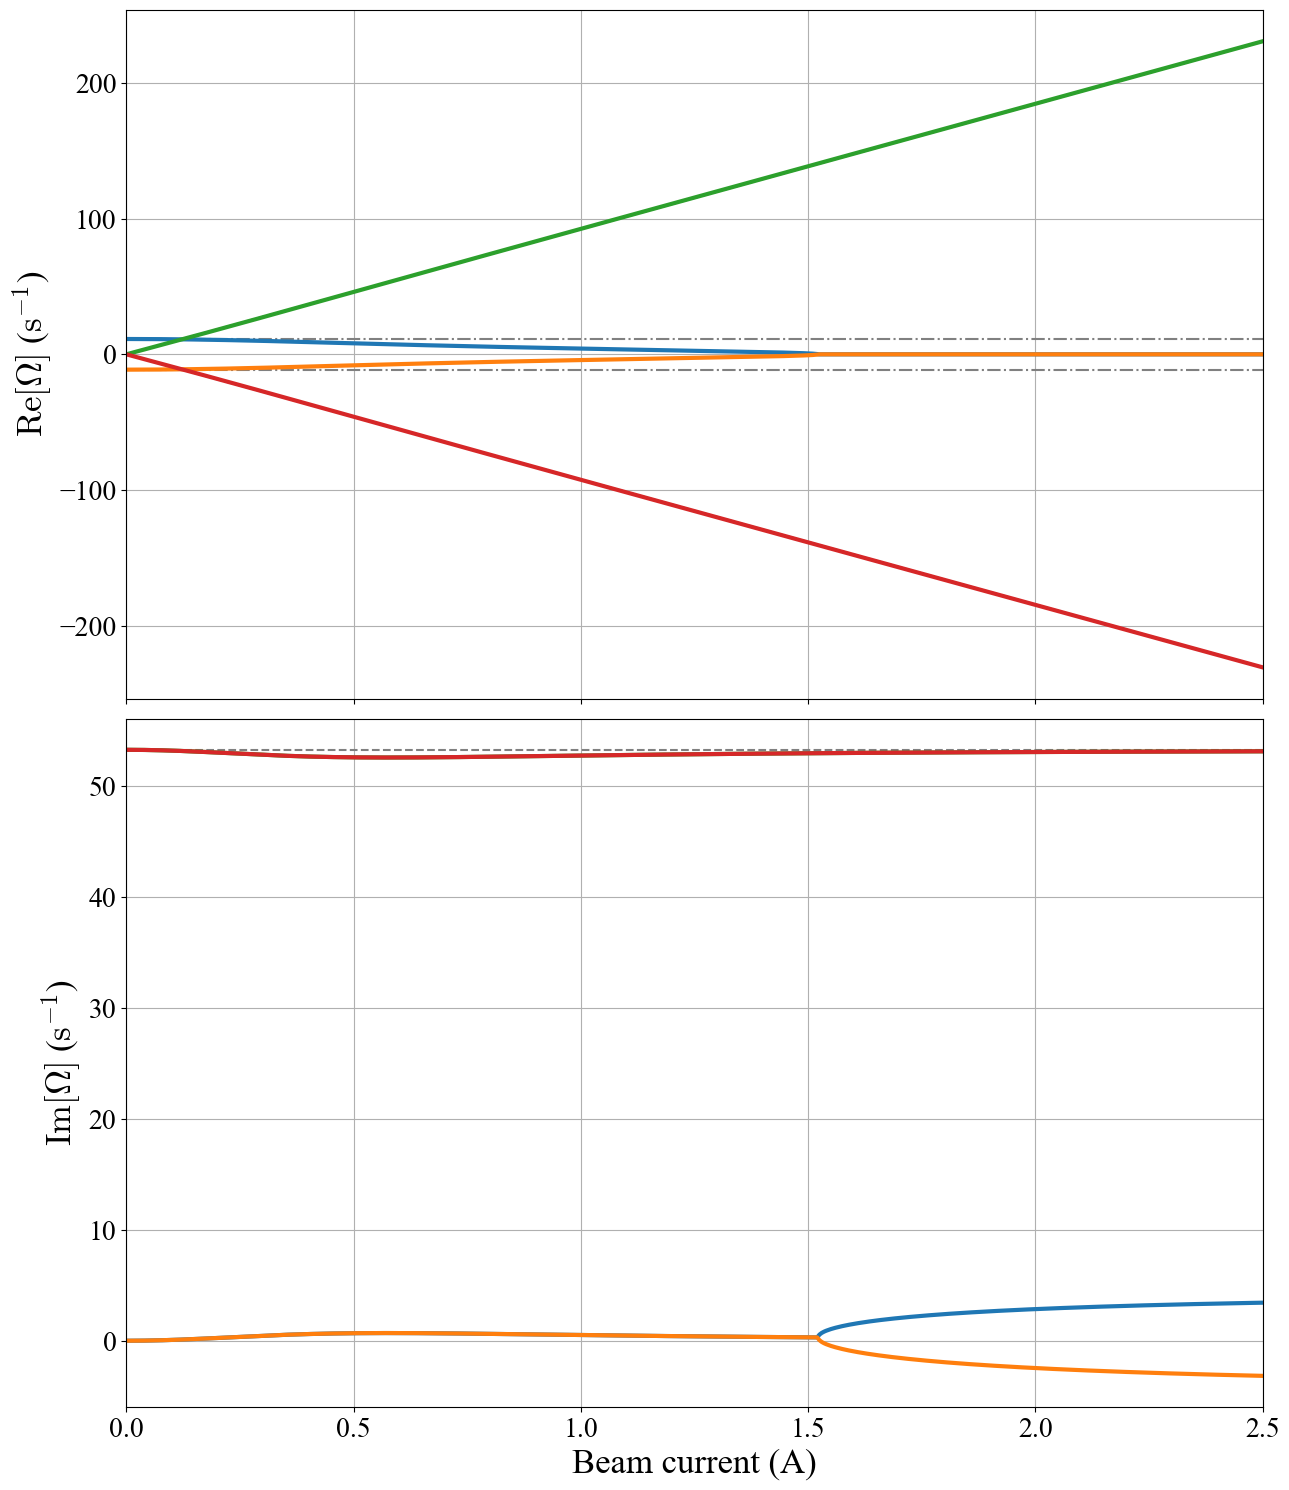

In [50]:
fig, ax = plt.subplots(2, figsize=(13,15), sharex=True)

ax[0].plot(Iave, 2*np.pi*delta_f*1e-3, ls='--', color='gray')
ax[0].plot(Iave, -2*np.pi*delta_f*1e-3, ls='--', color='gray')
ax[0].axhline(omega_s0*1e-3, ls='-.', color='gray')
ax[0].axhline(-omega_s0*1e-3, ls='-.', color='gray')
ax[1].plot(Iave, alpha_f*1e-3, ls='--', color='gray')

for i in [2,3,0,1]:
    ax[0].plot(Iave, roots[i].imag, lw=3)
    ax[1].plot(Iave, -roots[i].real, lw=3)

for i in range(2):
    ax[i].tick_params(labelsize=20)
    ax[i].grid()

ax[0].set_ylabel(r'$\mathrm{Re}[\Omega]$ ($\mathrm{s^{-1}}$)', fontsize=25)
ax[1].set_ylabel(r'$\mathrm{Im}[\Omega]$ ($\mathrm{s^{-1}}$)', fontsize=25)
ax[1].set_xlabel('Beam current (A)', fontsize=25)

ax[1].set_xlim((0., 2.5))

plt.tight_layout()
plt.show()